<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение возраста покупателей

## Исследовательский анализ данных

**Задание 1: провести исследовательский анализ данных**

План:

1. посмотреть на размер выборки;
2. построить график распределения возраста в выборке;
3. напечатать на экране 10–15 фотографий и посмотреть, как устроен датасет;
4. сделать выводы о том, как результаты исследования повлияют на обучение модели.

*Представлена одна папка со всеми изображениями (/datasets/faces/final_files) и CSV-файл labels.csv с двумя колонками: file_name и real_age.*

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, GlobalMaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_error

In [2]:
# загружаем данные из файла в датафрейм и выводим основную информацию о датафрейме с помощью метода info()
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Видим, что в датафрейме 2 столбца и 7 591 строк. В столбце file_name данные выражены строковым типом, в столбце real_age - целочисленным. Выведем первые 10 строк, а затем проверим на пропуски и дубликаты

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Выборка относительно небольшая, но мы еще можем нарастить ее, применяя аугментации


In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
# проверим количество пропусков в %
pd.DataFrame(round(labels.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
file_name,0.000000
real_age,0.000000


In [5]:
# проверим на наличие явных дубликатов
labels.duplicated().sum()

0

Видим, что пропусков и дубликатов нет. Теперь посмотрим на распределение данных.

In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Как видим, в выборке представлены фотографии людей возраста от одного до 100 лет. При этом среднее значение возраста составляет 31 год, а медиана - 29 лет. Построим диаграмму размаха возраста в выборке

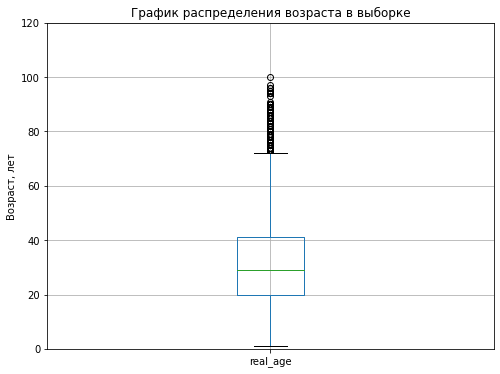

In [7]:
# посторим диаграмму размаха для цены
labels.boxplot(column='real_age', figsize=(8, 6))
plt.title('График распределения возраста в выборке')
plt.ylim(0, 120)
plt.ylabel('Возраст, лет')
plt.show()

Видим, что наиболее часто встречаются фотографии людей от 20 до 41 года. Фотографии людей старше 71 года на графике представлены как выбросы, что говорит о том, что число таких фото существенно меньше.

In [8]:
# Для построения наглядного графика разобьем значения столбца real_age на категории в соответствии с классификацией ВОЗ
def cat_age(real_age):
    try:
        if 1 <= real_age <= 6:
            return 'Дошкольный возраст'
        elif 7 <= real_age <= 12:
            return 'Младший школьный возраст'
        elif 13 <= real_age <= 17:
            return 'Подростковый возраст'
        elif 18 <= real_age <= 44:
            return 'Молодой возраст'
        elif 45 <= real_age <= 59:
            return 'Средний возраст'
        elif 60 <= real_age <= 74:
            return 'Пожилой возраст'
        elif 75 <= real_age <= 90:
            return 'Старческий возраст'
        elif real_age >= 91:
            return 'Долгожители'
    except:
        pass

In [9]:
labels_1 = labels.copy()
labels_1['real_age_category'] = labels_1['real_age'].apply(cat_age)
labels_1 = labels_1.drop(['real_age'], axis = 1)
labels_1.head()

,file_name,real_age_category
0,000000.jpg,Дошкольный возраст
1,000001.jpg,Молодой возраст
2,000002.jpg,Старческий возраст
3,000003.jpg,Средний возраст
4,000004.jpg,Подростковый возраст


Видим, что данные разделены на категории корректно. Теперь можно строить график.

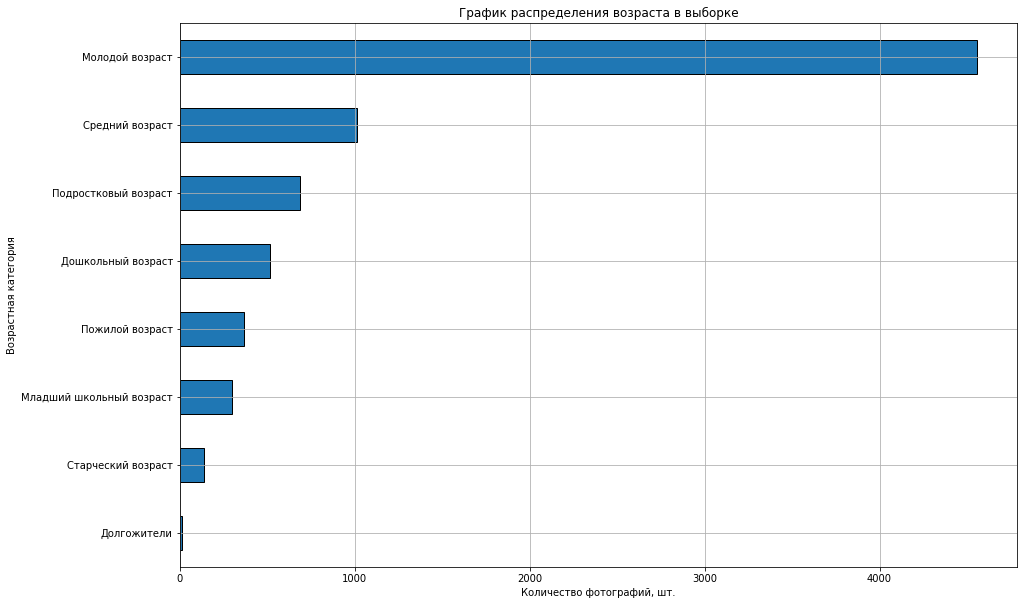

In [10]:
labels_1.pivot_table(index='real_age_category', values='file_name', aggfunc='count')\
.sort_values(by='file_name', ascending=True).plot.barh(grid=True, figsize=(15, 10), ec='black', legend=False)

plt.title('График распределения возраста в выборке')
plt.xlabel('Количество фотографий, шт.')
plt.ylabel('Возрастная категория')
plt.show()

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Важно еще поработать над оформлением графика (название горизонтальной оси, вертикальной оси и самого графика)    
    
 </div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Исправил: добавил название горизонтальной оси, вертикальной оси и самого графика. См. выше.
</div> 

<br/>    

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Как видим, подавляющее большинство фотографий в выборке относится к "Молодому возрасту": от 45 до 59 лет. Количество фотографий иных возрастных категорий существенно меньше. Т.е. присутствует дисбаланс

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще вывести гистограмму целевого признака. Добавь, пожалуйста. 
    
Раз у нас 100 различных возрастов, то и корзин можно указать столько же. 
    
Важно еще поработать над оформлением графика (название горизонтальной оси, вертикальной оси и самого графика)    
    
 </div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Исправил: добавил гистограмму целевого признака. См. ниже.
</div> 

<br/>    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Не стоило обрезать до 40 лет

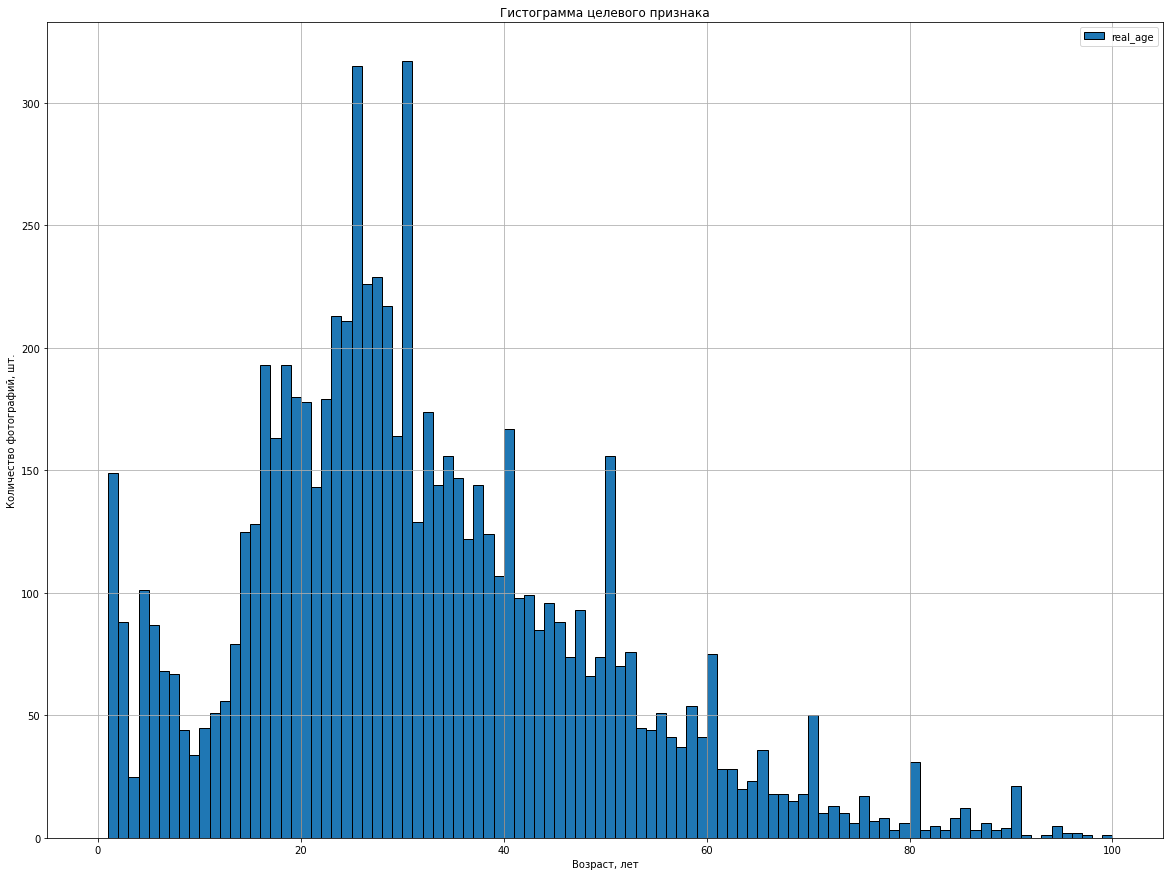

In [11]:
# построим гистограмму целевого признака
labels['real_age'].hist(bins=100, range=(0, 100), figsize=(20, 15), ec='black', legend=True)
plt.title('Гистограмма целевого признака')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество фотографий, шт.')
plt.show()

Как видим, распределение по возрасту неравномерное. Максимальные значения сосредоточены в диапазоне значений возраста от 23 до 30 лет, максимум приходится на 25 и 30 лет соответственно. Теперь перейдем к следующему пункту задания и напечатаем 12 изображений.

In [12]:
datagen = ImageDataGenerator(rescale=1./255)

# извлекаем данные из папки с помощью загрузчика
datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
# к какому размеру приводить изображения
        target_size=(150, 150),
# размер батча
        batch_size=16,
# в каком виде выдавать метки классов
        class_mode='raw',
# фиксируем генератор случайных чисел
        seed=12345)

Found 7591 validated image filenames.


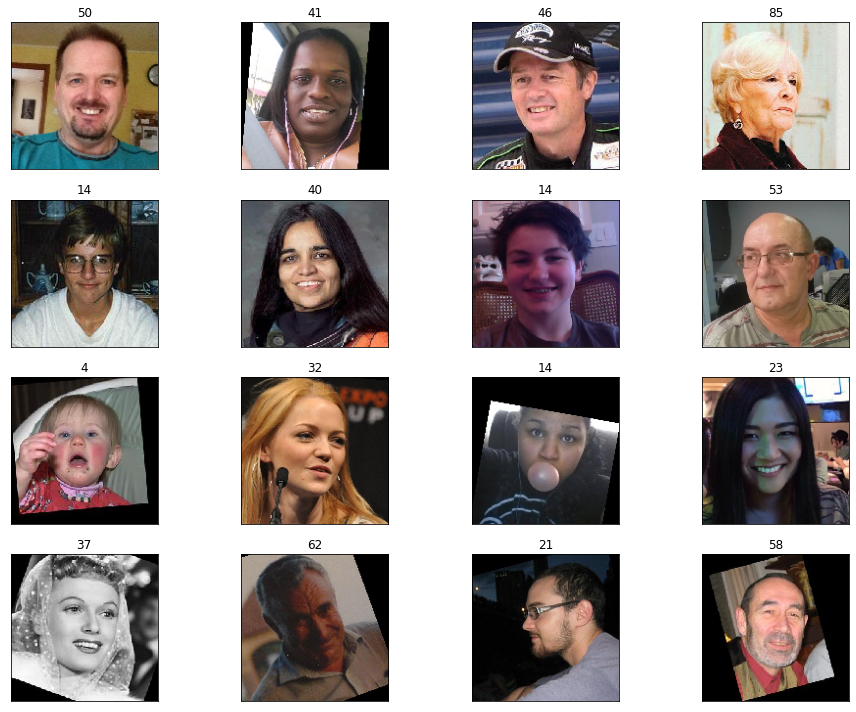

In [13]:
features, target = next(datagen_flow)
# выводим 16 изображений
size = plt.figure(figsize=(15,10))
for i in range(16):
    size.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.title(target[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!
    
Можно еще поработать над оформлением фото, в названиях каждого фото (title) указать возраст

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Возраст добавил
</div> 

<br/>    

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [14]:
print(features.shape) 
print()
print(target.shape) 

(16, 150, 150, 3)

(16,)


Т.е. в features.shape мы видим четырёхмерный тензор, в котором 16 изображений размером 150x150 с тремя цветовыми каналами.

**Вывод:**

- для исследования были представлены: одна папка со всеми изображениями (/datasets/faces/final_files) и CSV-файл labels.csv с двумя колонками: file_name и real_age;
- в датафрейме 2 столбца и 7 591 строк (в столбце file_name данные выражены строковым типом, в столбце real_age - целочисленным), пропуски и дубликаты отсутствуют; 
- в выборке представлены фотографии людей возраста от одного до 100 лет, при этом среднее значение возраста составляет 31 год, а медиана - 29 лет;
- подавляющее большинство фотографий в выборке относится к "Молодому возрасту": от 45 до 59 лет. Количество фотографий иных возрастных категорий существенно меньше. Т.е. **присутствует дисбаланс**;
- загрузчик ImageDataGenerator нашел в папке 7 591 изображений.

**Таким образом, мы имеем не очень большой набор данных, в котором присутствует дисбаланс. Это может негативно отразиться на обучении модели и качестве нашего исследования. Для снижения дисбаланса стоит использовать технику аугментации изображений редко представленных возрастных групп: в нашем случае это все, кроме группы "Молодой возраст".**

**Также видим, что фотографии выполнены как в анфас, так и в профиль. Размер изображений совпадает не у всех фотографий, при этом на некоторых присутствует вся фигура человека (причем на расстоянии и при этом лицо различить довольно проблематично), на некоторых в кадре больше одного человека. Есть фотографии, где часть головы человека закрыта посторонними предметами, рот закрыт пузырем от жевательной резинки. Общая ориентация фотографий также различается. Имеются как цветные, так и черно-белые фотографии.**

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Дополнил вывод, см. выше
</div> 

<br/>    

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, AvgPool2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50 

def load_train(path):
    labels = pd.read_csv(path+'labels.csv')                                                     
    train_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25)  
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        horizontal_flip=True,
        seed=42)
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path+'labels.csv')  
    test_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25)  
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation', 
        seed=42)

    return test_datagen_flow

def create_model(input_shape):

    backbone = ResNet50(input_shape= input_shape,
                    weights='imagenet', 
                    include_top= False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae']) 
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data, 
              validation_data= test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
        

Аугментации на тренировочной части лучше указывать в `ImageDataGenerator`, а не в `.flow_from_dataframe`

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Замечание некритичное. Учту на будущее
</div> 

<br/>    

```

# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >

2023-09-22 08:13:05.924876: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-09-22 08:13:06.269262: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2023-09-22 08:13:13.076424: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-09-22 08:13:13.694778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-22 08:13:13.694882: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:13.694928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:13.761543: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-22 08:13:13.778604: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-22 08:13:13.960784: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-22 08:13:13.976133: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-22 08:13:13.976259: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-22 08:13:13.979355: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-09-22 08:13:14.499007: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-09-22 08:13:14.535813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2100000000 Hz
2023-09-22 08:13:14.539068: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x44f1cb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-22 08:13:14.539100: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-09-22 08:13:14.726768: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3b51fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-22 08:13:14.726806: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-09-22 08:13:14.728496: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-22 08:13:14.728552: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:14.728563: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:14.728596: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-22 08:13:14.728606: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-22 08:13:14.728617: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-22 08:13:14.728627: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-22 08:13:14.728636: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-22 08:13:14.731607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-09-22 08:13:14.733949: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:16.974141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-09-22 08:13:16.974186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-09-22 08:13:16.974195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-09-22 08:13:16.977410: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-22 08:13:16.977461: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 7s
   73728/94765736 [..............................] - ETA: 1:08
  270336/94765736 [..............................] - ETA: 41s 
  753664/94765736 [..............................] - ETA: 21s
 2031616/94765736 [..............................] - ETA: 9s 
 4620288/94765736 [>.............................] - ETA: 5s
 8953856/94765736 [=>............................] - ETA: 3s
13148160/94765736 [===>..........................] - ETA: 2s
17063936/94765736 [====>.........................] - ETA: 1s
20815872/94765736 [=====>........................] - ETA: 1s
25165824/94765736 [======>.......................] - ETA: 1s
29360128/94765736 [========>.....................] - ETA: 1s
33513472/94765736 [=========>....................] - ETA: 1s
34496512/94765736 [=========>....................] - ETA: 1s
37732352/94765736 [==========>...................] - ETA: 1s
41615360/94765736 [============>.................] - ETA: 1s
42696704/94765736 [============>.................] - ETA: 1s
46120960/94765736 [=============>................] - ETA: 1s
50003968/94765736 [==============>...............] - ETA: 0s
51109888/94765736 [===============>..............] - ETA: 0s
54517760/94765736 [================>.............] - ETA: 0s
58621952/94765736 [=================>............] - ETA: 0s
59981824/94765736 [=================>............] - ETA: 0s
62906368/94765736 [==================>...........] - ETA: 0s
67092480/94765736 [====================>.........] - ETA: 0s
70787072/94765736 [=====================>........] - ETA: 0s
71925760/94765736 [=====================>........] - ETA: 0s
75481088/94765736 [======================>.......] - ETA: 0s
79093760/94765736 [========================>.....] - ETA: 0s
79675392/94765736 [========================>.....] - ETA: 0s
83869696/94765736 [=========================>....] - ETA: 0s
87760896/94765736 [==========================>...] - ETA: 0s
88072192/94765736 [==========================>...] - ETA: 0s
92266496/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 2s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/10
2023-09-22 08:13:35.339173: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:37.109139: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 75s - loss: 199.1953 - mae: 10.5806 - val_loss: 763.7927 - val_mae: 22.6094
Epoch 2/10
178/178 - 41s - loss: 97.7007 - mae: 7.4851 - val_loss: 620.5586 - val_mae: 19.8136
Epoch 3/10
178/178 - 41s - loss: 65.9859 - mae: 6.1998 - val_loss: 438.9579 - val_mae: 15.7487
Epoch 4/10
178/178 - 40s - loss: 40.2901 - mae: 4.8926 - val_loss: 219.4768 - val_mae: 10.9499
Epoch 5/10
178/178 - 41s - loss: 27.8085 - mae: 4.1023 - val_loss: 97.1580 - val_mae: 7.6206
Epoch 6/10
178/178 - 42s - loss: 21.7697 - mae: 3.5666 - val_loss: 84.8414 - val_mae: 7.0765
Epoch 7/10
178/178 - 40s - loss: 17.5242 - mae: 3.2175 - val_loss: 80.3637 - val_mae: 6.7382
Epoch 8/10
178/178 - 39s - loss: 13.8585 - mae: 2.8756 - val_loss: 92.1384 - val_mae: 7.4779
Epoch 9/10
178/178 - 39s - loss: 11.6881 - mae: 2.6046 - val_loss: 79.7508 - val_mae: 6.5826
Epoch 10/10
178/178 - 39s - loss: 9.9314 - mae: 2.4016 - val_loss: 80.1515 - val_mae: 6.7133
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 80.1515 - mae: 6.7133
Test MAE: 6.7133
2023-09-22 08:13:05.924876: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-09-22 08:13:06.269262: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2023-09-22 08:13:13.076424: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-09-22 08:13:13.694778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-22 08:13:13.694882: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:13.694928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:13.761543: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-22 08:13:13.778604: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-22 08:13:13.960784: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-22 08:13:13.976133: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-22 08:13:13.976259: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-22 08:13:13.979355: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-09-22 08:13:14.499007: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-09-22 08:13:14.535813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2100000000 Hz
2023-09-22 08:13:14.539068: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x44f1cb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-22 08:13:14.539100: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-09-22 08:13:14.726768: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3b51fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-22 08:13:14.726806: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-09-22 08:13:14.728496: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-22 08:13:14.728552: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:14.728563: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:14.728596: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-22 08:13:14.728606: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-22 08:13:14.728617: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-22 08:13:14.728627: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-22 08:13:14.728636: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-22 08:13:14.731607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-09-22 08:13:14.733949: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:16.974141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-09-22 08:13:16.974186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-09-22 08:13:16.974195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-09-22 08:13:16.977410: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-22 08:13:16.977461: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 7s
   73728/94765736 [..............................] - ETA: 1:08
  270336/94765736 [..............................] - ETA: 41s 
  753664/94765736 [..............................] - ETA: 21s
 2031616/94765736 [..............................] - ETA: 9s 
 4620288/94765736 [>.............................] - ETA: 5s
 8953856/94765736 [=>............................] - ETA: 3s
13148160/94765736 [===>..........................] - ETA: 2s
17063936/94765736 [====>.........................] - ETA: 1s
20815872/94765736 [=====>........................] - ETA: 1s
25165824/94765736 [======>.......................] - ETA: 1s
29360128/94765736 [========>.....................] - ETA: 1s
33513472/94765736 [=========>....................] - ETA: 1s
34496512/94765736 [=========>....................] - ETA: 1s
37732352/94765736 [==========>...................] - ETA: 1s
41615360/94765736 [============>.................] - ETA: 1s
42696704/94765736 [============>.................] - ETA: 1s
46120960/94765736 [=============>................] - ETA: 1s
50003968/94765736 [==============>...............] - ETA: 0s
51109888/94765736 [===============>..............] - ETA: 0s
54517760/94765736 [================>.............] - ETA: 0s
58621952/94765736 [=================>............] - ETA: 0s
59981824/94765736 [=================>............] - ETA: 0s
62906368/94765736 [==================>...........] - ETA: 0s
67092480/94765736 [====================>.........] - ETA: 0s
70787072/94765736 [=====================>........] - ETA: 0s
71925760/94765736 [=====================>........] - ETA: 0s
75481088/94765736 [======================>.......] - ETA: 0s
79093760/94765736 [========================>.....] - ETA: 0s
79675392/94765736 [========================>.....] - ETA: 0s
83869696/94765736 [=========================>....] - ETA: 0s
87760896/94765736 [==========================>...] - ETA: 0s
88072192/94765736 [==========================>...] - ETA: 0s
92266496/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 2s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/10
2023-09-22 08:13:35.339173: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:37.109139: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 75s - loss: 199.1953 - mae: 10.5806 - val_loss: 763.7927 - val_mae: 22.6094
Epoch 2/10
178/178 - 41s - loss: 97.7007 - mae: 7.4851 - val_loss: 620.5586 - val_mae: 19.8136
Epoch 3/10
178/178 - 41s - loss: 65.9859 - mae: 6.1998 - val_loss: 438.9579 - val_mae: 15.7487
Epoch 4/10
178/178 - 40s - loss: 40.2901 - mae: 4.8926 - val_loss: 219.4768 - val_mae: 10.9499
Epoch 5/10
178/178 - 41s - loss: 27.8085 - mae: 4.1023 - val_loss: 97.1580 - val_mae: 7.6206
Epoch 6/10
178/178 - 42s - loss: 21.7697 - mae: 3.5666 - val_loss: 84.8414 - val_mae: 7.0765
Epoch 7/10
178/178 - 40s - loss: 17.5242 - mae: 3.2175 - val_loss: 80.3637 - val_mae: 6.7382
Epoch 8/10
178/178 - 39s - loss: 13.8585 - mae: 2.8756 - val_loss: 92.1384 - val_mae: 7.4779
Epoch 9/10
178/178 - 39s - loss: 11.6881 - mae: 2.6046 - val_loss: 79.7508 - val_mae: 6.5826
Epoch 10/10
178/178 - 39s - loss: 9.9314 - mae: 2.4016 - val_loss: 80.1515 - val_mae: 6.7133
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 80.1515 - mae: 6.7133
Test MAE: 6.7133
2023-09-22 08:13:05.924876: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-09-22 08:13:06.269262: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2023-09-22 08:13:13.076424: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-09-22 08:13:13.694778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-22 08:13:13.694882: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:13.694928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:13.761543: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-22 08:13:13.778604: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-22 08:13:13.960784: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-22 08:13:13.976133: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-22 08:13:13.976259: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-22 08:13:13.979355: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-09-22 08:13:14.499007: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-09-22 08:13:14.535813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2100000000 Hz
2023-09-22 08:13:14.539068: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x44f1cb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-22 08:13:14.539100: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-09-22 08:13:14.726768: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3b51fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-22 08:13:14.726806: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-09-22 08:13:14.728496: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-22 08:13:14.728552: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:14.728563: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:14.728596: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-09-22 08:13:14.728606: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-09-22 08:13:14.728617: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-09-22 08:13:14.728627: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-09-22 08:13:14.728636: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-09-22 08:13:14.731607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-09-22 08:13:14.733949: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-09-22 08:13:16.974141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-09-22 08:13:16.974186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-09-22 08:13:16.974195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-09-22 08:13:16.977410: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-09-22 08:13:16.977461: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 7s
   73728/94765736 [..............................] - ETA: 1:08
  270336/94765736 [..............................] - ETA: 41s 
  753664/94765736 [..............................] - ETA: 21s
 2031616/94765736 [..............................] - ETA: 9s 
 4620288/94765736 [>.............................] - ETA: 5s
 8953856/94765736 [=>............................] - ETA: 3s
13148160/94765736 [===>..........................] - ETA: 2s
17063936/94765736 [====>.........................] - ETA: 1s
20815872/94765736 [=====>........................] - ETA: 1s
25165824/94765736 [======>.......................] - ETA: 1s
29360128/94765736 [========>.....................] - ETA: 1s
33513472/94765736 [=========>....................] - ETA: 1s
34496512/94765736 [=========>....................] - ETA: 1s
37732352/94765736 [==========>...................] - ETA: 1s
41615360/94765736 [============>.................] - ETA: 1s
42696704/94765736 [============>.................] - ETA: 1s
46120960/94765736 [=============>................] - ETA: 1s
50003968/94765736 [==============>...............] - ETA: 0s
51109888/94765736 [===============>..............] - ETA: 0s
54517760/94765736 [================>.............] - ETA: 0s
58621952/94765736 [=================>............] - ETA: 0s
59981824/94765736 [=================>............] - ETA: 0s
62906368/94765736 [==================>...........] - ETA: 0s
67092480/94765736 [====================>.........] - ETA: 0s
70787072/94765736 [=====================>........] - ETA: 0s
71925760/94765736 [=====================>........] - ETA: 0s
75481088/94765736 [======================>.......] - ETA: 0s
79093760/94765736 [========================>.....] - ETA: 0s
79675392/94765736 [========================>.....] - ETA: 0s
83869696/94765736 [=========================>....] - ETA: 0s
87760896/94765736 [==========================>...] - ETA: 0s
88072192/94765736 [==========================>...] - ETA: 0s
92266496/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 2s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/10
2023-09-22 08:13:35.339173: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-22 08:13:37.109139: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 75s - loss: 199.1953 - mae: 10.5806 - val_loss: 763.7927 - val_mae: 22.6094
Epoch 2/10
178/178 - 41s - loss: 97.7007 - mae: 7.4851 - val_loss: 620.5586 - val_mae: 19.8136
Epoch 3/10
178/178 - 41s - loss: 65.9859 - mae: 6.1998 - val_loss: 438.9579 - val_mae: 15.7487
Epoch 4/10
178/178 - 40s - loss: 40.2901 - mae: 4.8926 - val_loss: 219.4768 - val_mae: 10.9499
Epoch 5/10
178/178 - 41s - loss: 27.8085 - mae: 4.1023 - val_loss: 97.1580 - val_mae: 7.6206
Epoch 6/10
178/178 - 42s - loss: 21.7697 - mae: 3.5666 - val_loss: 84.8414 - val_mae: 7.0765
Epoch 7/10
178/178 - 40s - loss: 17.5242 - mae: 3.2175 - val_loss: 80.3637 - val_mae: 6.7382
Epoch 8/10
178/178 - 39s - loss: 13.8585 - mae: 2.8756 - val_loss: 92.1384 - val_mae: 7.4779
Epoch 9/10
178/178 - 39s - loss: 11.6881 - mae: 2.6046 - val_loss: 79.7508 - val_mae: 6.5826
Epoch 10/10
178/178 - 39s - loss: 9.9314 - mae: 2.4016 - val_loss: 80.1515 - val_mae: 6.7133
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
    ['...']
60/60 - 10s - loss: 80.1515 - mae: 6.7133
Test MAE: 6.7133

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

- для исследования были представлены: одна папка со всеми изображениями (/datasets/faces/final_files) и CSV-файл labels.csv с двумя колонками: file_name и real_age;
- в датафрейме 2 столбца и 7 591 строк (в столбце file_name данные выражены строковым типом, в столбце real_age - целочисленным), пропуски и дубликаты отсутствуют; 
- в выборке представлены фотографии людей возраста от одного до 100 лет, при этом среднее значение возраста составляет 31 год, а медиана - 29 лет;
- подавляющее большинство фотографий в выборке относится к "Молодому возрасту": от 45 до 59 лет. Количество фотографий иных возрастных категорий существенно меньше. Т.е. **присутствует дисбаланс**;
- загрузчик ImageDataGenerator нашел в папке 7 591 изображений.

Далее мы построили и обучили свёрточную нейронную сеть с использованием архитектуры ResNet50 на датасете с фотографиями людей. Если смотреть на эпохи модели, мы видим поэтапное снижение значения MAE на тестовой выборке: так, для 1-й эпохи оно составляло 22.6094, для 5-й уже 7.6206 и на последней (10-й) эпохе достигнуто значение 6.7133. 

По условиям проекта необходимо достигнуть значения MAE на тестовой выборке не больше 8. Соответственно, поставленая задача выполнена.

<div class="alert alert-success"> 
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера  <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
     
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
 
</div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Замечания исправил. Проект можно принимать)
</div> 

<br/>    

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально, молодец! Принимаю твой проект)
    
Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Видеокурс от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc    
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Удачи тебе в финальном проекте!
  
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы